In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = "pakbro00001"
os.environ['KAGGLE_KEY'] = "63b48a868d9f8779aa53345d24ce8ace"

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 42.8MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.8MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from keras.models import load_model
import keras
import numpy as np
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image

#CATEGORIES = ['Cat', 'Dog']
#model = keras.models.load_model('/content/final_model.h5')

def load_image(path):
    
    img = image.load_img(path,target_size=(150,150))
    img_array = np.array(img)
    img_array=img_array.reshape(1,150,150,3)
    return img_array

img = load_image('/content/dogs_vs_cats/test/cats/cat.10.jpg')
model = load_model('/content/trained_model.h5')
result = model.predict(img)

print(result[0])

1/1 [==============================] - 0s 138ms/step
[0.]


In [ ]:
img = load_image('/content/dogs_vs_cats/test/cats/cat.10030.jpg')
model = load_model('/content/trained_model.h5')
result = model.predict(img)

print(result[0])

1/1 [==============================] - 0s 135ms/step
[0.15049087]


In [ ]:
img = load_image('/content/dogs_vs_cats/test/dogs/dog.10021.jpg')
model = load_model('/content/trained_model.h5')
result = model.predict(img)

print(result[0])

1/1 [==============================] - 0s 138ms/step
[1.]


In [ ]:
import shutil

In [ ]:
src = '/content/test/dogs'
new_distination = '/content/database'
for dirs , subdirs ,files in os.walk(src):
  for file in files:
    if file.endswith('.jpg'):
      filename = os.path.join(src,dirs,file)
      if os.path.exists(filename):
        shutil.copy(filename,new_distination)

In [ ]:
import pandas as pd


In [ ]:
arra = []
model = load_model('/content/trained_model.h5')

for images in os.listdir(new_distination):
    if (images.endswith(".jpg")):
      img = load_image('/content/database/'+images)
      result = model.predict(img)
      arra.extend([(images,result)])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 39ms/step


In [ ]:
i = 0
for i in range(10):
  print(arra[i][0]," == ",arra[i][1])

cat.1076.jpg  ==  [[0.]]
cat.3292.jpg  ==  [[0.]]
cat.8822.jpg  ==  [[0.]]
cat.7088.jpg  ==  [[0.]]
cat.2089.jpg  ==  [[0.]]
cat.7615.jpg  ==  [[0.]]
cat.11380.jpg  ==  [[0.]]
cat.9287.jpg  ==  [[0.]]
cat.7091.jpg  ==  [[0.]]
cat.1120.jpg  ==  [[0.]]


In [ ]:
arra.sort(key=lambda x: x[1])

In [ ]:
print(arra[4880][0])

cat.7376.jpg


In [ ]:
#write input file name only and run the next cells to generate output
input_image = 'cat.3.jpg'

In [ ]:
img = load_image('/content/imageclassifire/' + input_image)
model = load_model('/content/trained_model.h5')
result = model.predict(img)
print(result)
temp = []

for i in range(len(arra)):
  if arra[i][1] >= result:
    temp.extend([(arra[i-2][0],arra[i-2][1])])
    temp.extend([(arra[i-1][0],arra[i-1][1])])
    temp.extend([(arra[i][0],arra[i][1])])
    temp.extend([(arra[i+1][0],arra[i+1][1])])
    temp.extend([(arra[i+2][0],arra[i+2][1])])
    break
  elif i + 1 == len(arra) or i == len(arra):
    k = i - 5
    for j in range(5):
      temp.extend([(arra[k][0],arra[k][1])])
      k+=1
    break


1/1 [==============================] - 0s 160ms/step
[[0.99961805]]
cat.3.jpg


Input image is : 


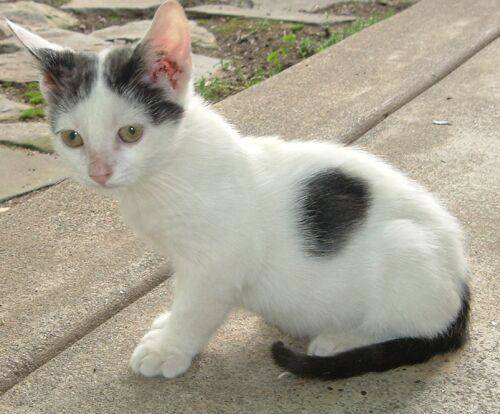

In [ ]:
print("Input image is : ")

display(Image('/content/imageclassifire/' + input_image))

Output images are : 


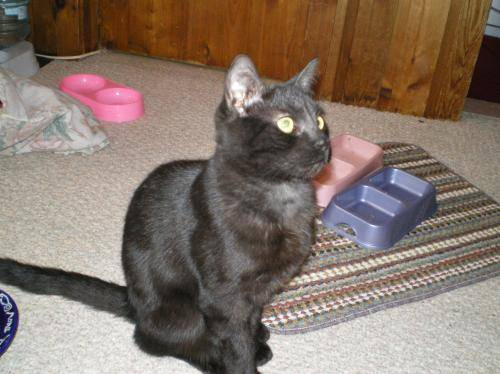

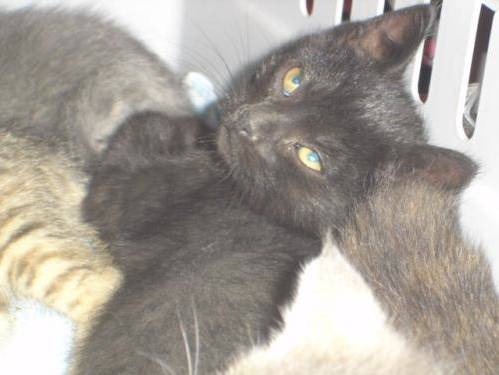

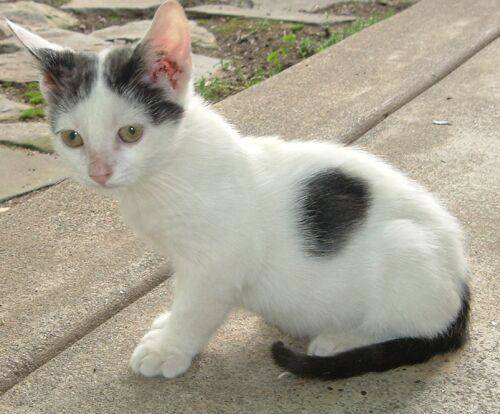

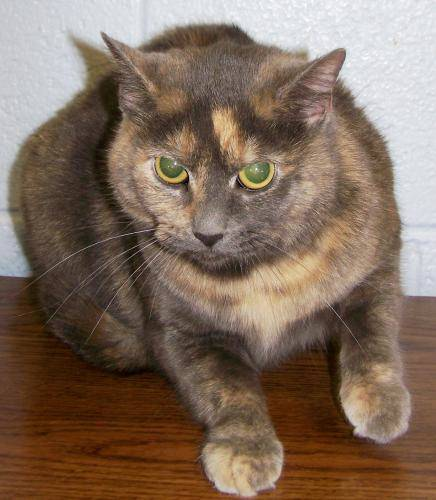

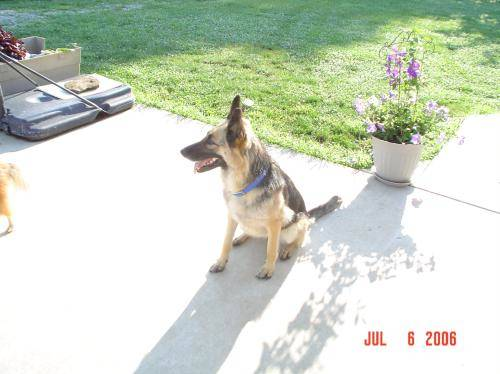

In [ ]:
from IPython.display import Image, display
print("Output images are : ")
for i in range(5):
  display(Image('/content/database/' + temp[i][0]))